# Проект e-learning
Сергей Жарков

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [146]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

## 1. Сколько студентов успешно сдали только один курс?

Успешная сдача — это зачёт на экзамене. Для задания понадобятся оценки студентов и информация об экзаменах.

### Посмотрим на таблицу с оценками:

In [147]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [148]:
# Пропущеные значения
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [149]:
# В оценках есть 173 пропущеных значения.
studentAssessment.query("score.isnull()").head()

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN


In [150]:
# Перезачеты
# is_banked — факт перезачета теста с прошлого семестра
studentAssessment.is_banked.value_counts()
# 1909 человек получили перезачет. Не будем считать перезачет успешной сдачей экзамена.
# Этот зачет был получен раньше.

0    172003
1      1909
Name: is_banked, dtype: int64

In [151]:
# Посмотрим на студентов, получивших перезачет.
# date_submitted — дата сдачи теста студентом, количество дней с начала семестра.
studentAssessment.query("is_banked == 1").date_submitted.value_counts()
# У всех студентов, которые получили перезачет, датой сдачи стоит -1, 

-1    1909
Name: date_submitted, dtype: int64

In [152]:
# посмотрим, есть ли студенты с такой датой экзамена, которые не получали перезачет.
studentAssessment.query("is_banked == 0 and date_submitted == -1").date_submitted.value_counts()
# Еще 18 человек имеют необычную дату перезачета

-1    18
Name: date_submitted, dtype: int64

In [153]:
studentAssessment.query("is_banked == 0 and date_submitted == -1")
# У них разные оценки, возможно эти студенты не сдавали экзамен.
# Возможно, преподаватели ошиблись выставляя дату. 

,id_assessment,id_student,date_submitted,is_banked,score
29017,15008,614117,-1,0,65.0
29076,15008,618197,-1,0,70.0
29551,15008,2334930,-1,0,80.0
38781,15020,653762,-1,0,1.0
39490,15020,2276854,-1,0,1.0
39722,15020,373846,-1,0,1.0
40310,15020,640291,-1,0,1.0
109447,34865,2000491,-1,0,100.0
110431,34865,558018,-1,0,100.0
150139,34904,689832,-1,0,86.0


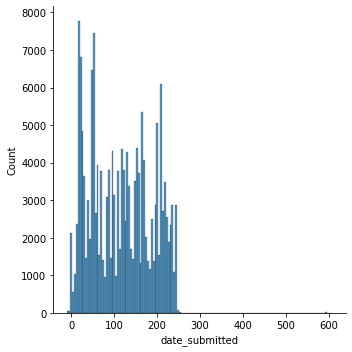

In [154]:
# Посмотрим на распределение даты зачета
sns.displot(studentAssessment, x='date_submitted')
#Отрицательные значения мы проработали

In [155]:
#Посомтрим, что за студенты оттянули наш график вправо
studentAssessment.query("is_banked == 0 and date_submitted > 500").is_banked.value_counts()
# Это 30 человек, которые сдали после 500 дня

0    30
Name: is_banked, dtype: int64




### Посмотрим на таблицу с тестами:

In [156]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [157]:
assessments.isnull().sum()
# 11 пропущеных значений в дате теста.

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [158]:
#Посмотрим на экзамены.
assessments.query("assessment_type == 'Exam'").count()
# 11 пропущеных дат тут. 
# Пропущены даты как за 2013 так и за 2014, в разных курсах и семестрах
# Предположим что эти экзамены просто не имели фиксированой даты сдачи и пойдем дальше.

code_module          24
code_presentation    24
id_assessment        24
assessment_type      24
date                 13
weight               24
dtype: int64

In [159]:
# Вес каждого экзамена  - 100%
# Посмотрим, есть ли другие тесты с весом в 100%. Это могут быть курсовая или дипломная работы.
assessments.query("weight == 100.0").assessment_type.value_counts()
# Таких предметов нет.

Exam    24
Name: assessment_type, dtype: int64

### Посмотрим на общую таблицу с необходимыми нам фильтрами

In [160]:
exam = pd.merge(studentAssessment, assessments, on="id_assessment") \
         .query("assessment_type == 'Exam'")
exam

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0


In [161]:
# Пропущеные значения в дате нас не пугают
exam.isnull().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
assessment_type         0
date                 2865
weight                  0
dtype: int64

In [162]:
# Перезачетов на экзаменах не было
exam.query("is_banked == 1").is_banked.count()

0

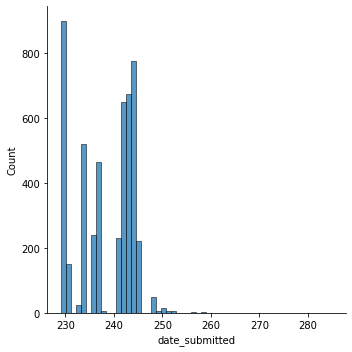

In [163]:
#Даты экзаменов:
sns.displot(exam, x='date_submitted')

### Ищем студентов, которые успешно сдали только один курс.
Набрали 40 или больше балов на экзамене.


In [164]:
exam.query("score >= 40") \
    .groupby('id_student', as_index=False) \
    .agg({'score': 'count'})\
    .rename(columns={'score': 'count_course'})\
    .count_course.value_counts()

1    3802
2     295
Name: count_course, dtype: int64

### Вывод:
3802 человека успешно завершили только один курс. 295 человек успешно завершили два курса

#  

## 2. Выявить самый сложный и самый простой экзамены.
Найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. Завершаемость = кол-во успешных экзаменов кол-во всех попыток сдать экзамен

In [165]:
#Все, кто пробовал сдать экзамен
exam_try = exam.groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=False)\
    .agg({'score': 'count'})\
    .rename(columns={"score": "try"})

In [166]:
#Все, кто сдал экзамен
exam_success = exam.query("score >= 40")\
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=False)\
    .agg({'score': 'count'})\
    .rename(columns={"score": "success"})

In [167]:
exam_score = pd.merge(exam_try, exam_success, on=['code_module', 'code_presentation', 'id_assessment'])
exam_score['completion'] = exam_score['success'] / exam_score['try']
exam_score.sort_values('completion', ascending=False)

,code_module,code_presentation,id_assessment,try,success,completion
4,DDD,2014B,25361,524,485,0.925573
3,DDD,2013J,25354,968,878,0.907025
0,CCC,2014B,24290,747,664,0.888889
5,DDD,2014J,25368,950,842,0.886316
1,CCC,2014J,24299,1168,1019,0.872432
2,DDD,2013B,25340,602,504,0.837209


### Вывод:
Самый простой экзамен - 25361. Код предмета: DDD Cеместр: 2014B. Его сдали 93% студентов.  
Самый псложный - 25340. Код предмета: DDD Cеместр: 2013B. Его сдали 84% студентов.

#  

## 3. По каждому предмету определим средний срок сдачи экзаменов
Под сдачей понимаем последнее успешное прохождение экзамена студентом

In [168]:
# Если не трогать семестры:
exam.query("score >= 40")\
    .groupby(['code_module'], as_index=False)\
    .agg({'date_submitted': 'mean', 'date': 'mean'})\
    .rename(columns={"date_submitted": "mean_date_submitted"})\
    .sort_values('mean_date_submitted', ascending=False)

,code_module,mean_date_submitted,date
0,CCC,239.345217,NaN
1,DDD,237.976006,250.135512


In [169]:
# Если разбить на семестры
exam.query("score >= 40")\
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=False)\
    .agg({'date_submitted': 'mean', 'date': 'mean'})\
    .rename(columns={"date_submitted": "mean_date_submitted"})\
    .sort_values('mean_date_submitted', ascending=False)\
    .merge(courses, on=['code_module', 'code_presentation'])

,code_module,code_presentation,id_assessment,mean_date_submitted,date,module_presentation_length
0,CCC,2014J,24299,244.404318,NaN,269
1,DDD,2014J,25368,242.804038,NaN,262
2,DDD,2013J,25354,239.509112,261.0,261
3,DDD,2014B,25361,234.936082,241.0,241
4,CCC,2014B,24290,231.581325,NaN,241
5,DDD,2013B,25340,230.164683,240.0,240


### Вывод:

Средний срок сдачи экзаменов : CCC - 239 дней, DDD - 238 дней

Если подтянуть информацию о module_presentation_length — продолжительности семестра в днях,
увидим: окончательная дата сдачи теста, если указана, совпадает с длиной семестра.

В среднем студенты успевают сдать экзамен до конца семестра.



#  

## 4. Выяви самые популярные курсы по количеству регистраций на них. Курсы с самым большим оттоком.

Нужен ТОП-3 курсов




### Посмотрим данные о регистрации на курсы

In [170]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [171]:
studentRegistration.isnull().sum()
#Пропущеные значения в date_unregistration - это студенты, которые окончили курс

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [172]:
#Пропущеные значения date_registration - это отсутствие информации о дате регистрации на курс
studentRegistration.query("date_registration.isnull()").head()
# Нас интересует количество людей, которые регистрировались на курс.
# Оставим пропущеные значения в датафрейме

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0


In [173]:
studentRegistration.id_student.count()
# Всего регистраций

32593

In [174]:
studentRegistration.id_student.nunique()
# Уникальных студентов

28785

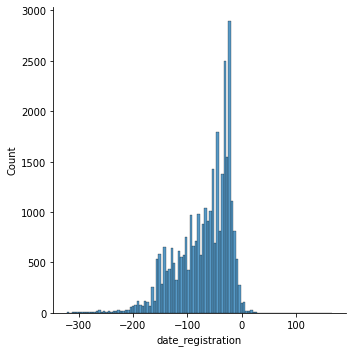

In [175]:
# Как распределились даты регистрации
sns.displot(studentRegistration, x='date_registration')

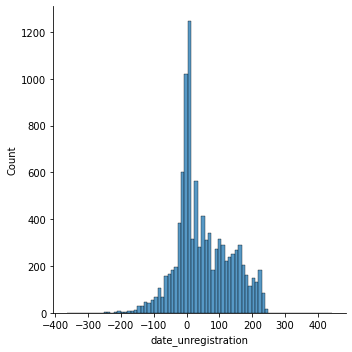

In [176]:
# Как распределились даты отмены регистрации
sns.displot(studentRegistration, x='date_unregistration')

In [177]:
# Посмотрим, не вмешиваются ли студенты, которые несколько раз зарегитстрировались на один и тот - же курс.
studentRegistration \
    .groupby(['code_module', 'code_presentation', 'id_student'], as_index=False) \
    .agg({'date_registration': 'count'})\
    .date_registration.value_counts()
# Студентов, которые несколько раз зарегестрировались под одним id на один и тот - же курс нет.

1    32548
0       45
Name: date_registration, dtype: int64

### Посмотрим на курсы

Посчитаем, сколько человек регистрировались на курс, сколько человек его покинули.

Показатель оттока, как оношение тех, кто ушел, к тем, кто регистрировался.

Самые популярные курсы:

In [178]:
popular = studentRegistration \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'count', 'date_unregistration': 'count'}) \
    .rename(columns={"id_student": "count_student", "date_unregistration": "unregistration_student"})\
    .sort_values('count_student', ascending=False)
popular['churn_rate'] = popular.unregistration_student / popular.count_student
popular.head(3)

,code_module,count_student,unregistration_student,churn_rate
1,BBB,7909,2377,0.300544
5,FFF,7762,2380,0.306622
3,DDD,6272,2235,0.356346


Отток:

In [179]:
popular.sort_values('churn_rate', ascending=False).head(3)

,code_module,count_student,unregistration_student,churn_rate
2,CCC,4434,1947,0.439107
3,DDD,6272,2235,0.356346
5,FFF,7762,2380,0.306622


### Вывод:

Самые популярные курсы: BBB	- 7909 регистраций, FFF - 7762 регистраций, DDD - 6272 регистраций

Самый большой отток: CCC покидает 44 % студентов, DDD покидает 36 % студентов, FFF покидает 31 % студентов.

#  

# 5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. 
В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов \
и самыми долгими средними сроками сдачи курсов.

In [180]:
def code_presentation_score(studentAssessment, assessments):
    exam_try = pd\
        .merge(studentAssessment, assessments, on="id_assessment") \
        .query("assessment_type == 'Exam'") \
        .groupby(['code_presentation'], as_index=False)\
        .agg({'score': 'count'})\
        .rename(columns={"score": "try"})

    exam_success = pd\
        .merge(studentAssessment, assessments, on="id_assessment") \
        .query("assessment_type == 'Exam' and score >= 40")\
        .groupby(['code_presentation'], as_index=False)\
        .agg({'score': 'count', 'date_submitted': 'mean'})\
        .rename(columns={"score": "success"})

    exam_score = pd.merge(exam_try, exam_success, on=['code_presentation'])
    exam_score['completion'] = exam_score['success'] / exam_score['try']
    exam_score = exam_score.set_index('code_presentation')
    return print(f'Cеместр с самой низкой завершаемостью курсов: {exam_score.completion.idxmin()}',
            f'Cеместр с самыми долгими средними сроками сдачи курсов: {exam_score.date_submitted.idxmax()}', sep='\n')





In [181]:
code_presentation_score(studentAssessment, assessments)

Cеместр с самой низкой завершаемостью курсов: 2013B
Cеместр с самыми долгими средними сроками сдачи курсов: 2014J


### Вывод:

Cеместр с самой низкой завершаемостью курсов: 2013B

Cеместр с самыми долгими средними сроками сдачи курсов: 2014J    

#  

## 6. Строим адаптированные RFM-кластеры студентов

R - среднее время сдачи одного экзамена 
- 1 - Студент пытался сдать, но не сдал экзамен
- 2 - Сдал до конца семестра
- 3 - Сдал после окончания семестра

F - завершаемость курсов 
- 1 - Студент не завершил курс
- 2 - Завершил один курс
- 3 - Завершил два курса

M - среднее количество баллов, получаемое за экзамен. 

- 1 - Получил меньше 40 баллов
- 2 - Получил от 40 до 60 баллов - Удовлетворительно
- 3 - Получил от 60 до 80 баллов - Хорошо
- 4 - Получил больше 80 баллов - Отлично

### RFM-анализ
Идея RFM-анализа в том, чтобы разделить аудиторию и направлять маркетинговые ресурсы в нужном направлении. Мы сегментируем клиентскую базу по трем основным показателям поведения. В каждой из трёх групп выделяем еще по три группы.Получаем распределение по 27 сегментам.

Сложность в том, что в ритейле можно оценивать давность, частоту покупок и сумму покупок обособлено. Человек мог давно купить на большую сумму или недавно начать, но покупать постоянно. При анализе потребительского поведения можно задействовать все 27 кластеров.

### Основные категории нашего исследования:
    
Можно пойти прямым путем и посчитать, средне время сдачи, среднее количество баллов. С опорой на это среднее время выделить группы и разделить студентов по ним, но такой подход кажется ошибочным.

Мы пытаемся сегментировать аудиторию. Хочется сделать это по зависящим от студентов обстоятельствам

#### R - среднее время сдачи одного экзамена

Оно явно зависит от даты экзамена и длинны семестра

Если делить студентов, которые сдали в разные дни, есть риск разнести по разным категориям людей, дата экзамена которых выпала на разные дни.

Поделим студентов на 3 категории:
- 1 - Студент пытался сдать, но не сдал экзамен
- 2 - Сдал до конца семестра
- 3 - Сдал после окончания семестра

#### F - завершаемость курсов

Из первого задания мы узнали, как делятся студентв по количеству завершенных курсов
- 1 - Студент не завершил курс
- 2 - Завершил один курс
- 3 - Завершил два курса


#### M - среднее количество баллов, получаемое на экзамене.

У нас уже есть нижняя граница в 40 баллов. Те, кто сдал хуже с экзаменом не справились.

Разделим тех, кто справился на равные группы: сдали, сдали хорошо, сдали отлично

- 1 - Получил меньше 40 баллов
- 2 - Получил от 40 до 60 баллов - Удовлетворительно
- 3 - Получил от 60 до 80 баллов - Хорошо
- 4 - Получил 80 и больше - Отлично


Такой подход сделает часть кластеров невозможными. К примеру:

Студент, который сдал экзамен, не мог получить меньше 40 баллов.

Вычеркиваем группы 221, 321, 231, 331 - они невозможны.

Да, это уменьшает количество кластеров, но позволяет разделить аудиторию и проверить качество рассчетов


In [182]:
# Для самопроверки узнаем, сколько всего было студентов, которые пытались сдать экзамен
pd.merge(studentAssessment, assessments, on="id_assessment") \
    .merge(courses, on=['code_module', 'code_presentation'])\
    .query("assessment_type == 'Exam'")\
    .id_student.nunique()

4633

### R - среднее время сдачи одного экзамена

In [183]:
# Еще раз, как в 3 пункте, сравниваем дату экзамена с продолжительностью семестра
pd.merge(studentAssessment, assessments, on="id_assessment") \
    .merge(courses, on=['code_module', 'code_presentation'])\
    .query("assessment_type == 'Exam'") \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'date': 'mean', 'module_presentation_length': 'mean'})
# Там, где дата экзамена указана, она совпадает с датой окончания семестра.

,code_module,code_presentation,date,module_presentation_length
0,CCC,2014B,NaN,241
1,CCC,2014J,NaN,269
2,DDD,2013B,240.0,240
3,DDD,2013J,261.0,261
4,DDD,2014B,241.0,241
5,DDD,2014J,NaN,262


Посмотрим, не вмешаются ли в наши рассчеты разные попытки одного студента сдать экзамен. Сгруппировав всех сутдентов по их Id и по Id экзамена, получим, что все студенты имели только одну попытку сдачи экзамена.

In [184]:
# Сколько раз конкретный студент пытался сдать конкретный экзамен
pd.merge(studentAssessment, assessments, on="id_assessment") \
    .query("assessment_type == 'Exam'") \
    .groupby(['id_student', 'id_assessment'], as_index=False) \
    .agg({'score': 'count'}) \
    .score.value_counts()

1    4959
Name: score, dtype: int64

Найдем, за сколько дней до конца семестра студент сдал экзамен. Если число отрицательное, то студент сдал раньше срока. Если положительное - позже

In [185]:
# За сколько дней до конца семетра был сдан экзамен
date_exams = pd.merge(studentAssessment, assessments, on="id_assessment") \
    .merge(courses, on=['code_module', 'code_presentation'])\
    .query("assessment_type == 'Exam'")
date_exams['date_exam'] = date_exams.date_submitted - date_exams.module_presentation_length

In [186]:
# Собираем тех студентов, кто сдал и сдал вовремя.
# Если один студент сдал два экзамена, один до конца и другой после, получим среднее время сдачи.
in_time = date_exams\
    .query("score >= 40 and date_exam < 0")\
    .groupby('id_student', as_index=False)\
    .agg({'date_exam': 'mean'})\
    .rename(columns={"date_exam": "recency"})
in_time['recency'] = 2

In [187]:
# Собираем тех студентов, кто сдал и сдал после окончания семестра.
later = date_exams.query("score >= 40 and date_exam > 0")\
    .groupby('id_student', as_index=False)\
    .agg({'date_exam': 'mean'})\
    .rename(columns={"date_exam": "recency"})
later['recency'] = 3

In [188]:
# Те, кто не сдал. Нужно понимать, что тут могут оказаться те, кто не сдал один экзамен и сдал второй.
fail = date_exams\
    .query("score < 40")\
    .groupby('id_student', as_index=False)\
    .agg({'date_exam': 'mean'})\
    .rename(columns={"date_exam": "recency"})
fail['recency'] = 1

In [189]:
# Склеим три таблицы в одну, удалив дубликаты
recency = pd.concat([in_time, later, fail]).drop_duplicates('id_student')
recency
# drop_duplicates по умолчанию удаляет дубликаты, за исключением первого вхождения

,id_student,recency
0,23698,2
1,24213,2
2,27116,2
3,28046,2
4,28787,2
...,...,...
559,2611779,1
560,2615956,1
561,2655683,1
562,2661870,1


4633 студента, никого не потеряли.

### F - завершаемость курсов

Есть студенты, которые завершили 2 курса, завершили один курс или не завершили ничего.

In [190]:
# Те, кто завешили 2 курса, получат цифру 3, один курс - цифтру 2. Ноль - 1
frequency_success = pd.merge(studentAssessment, assessments, on="id_assessment") \
    .query("assessment_type == 'Exam' and score >= 40")\
    .groupby('id_student', as_index=False)\
    .agg({'assessment_type': 'count'})\
    .rename(columns={"assessment_type": "frequency"})
frequency_success.frequency += 1

In [191]:
frequency_try = pd.merge(studentAssessment, assessments, on="id_assessment") \
    .query("assessment_type == 'Exam' and score < 40")\
    .groupby('id_student', as_index=False)\
    .agg({'assessment_type': 'count'})\
    .rename(columns={"assessment_type": "frequency"})
frequency_try.frequency = 1

In [192]:
frequency = pd.concat([frequency_success, frequency_try]).drop_duplicates('id_student')
frequency

,id_student,frequency
0,23698,2
1,24213,2
2,27116,2
3,28046,2
4,28787,2
...,...,...
559,2611779,1
560,2615956,1
561,2655683,1
562,2661870,1


4633 студента, никого не потеряли.

### M - среднее количество баллов, получаемое за экзамен.

In [193]:
monetary_success = pd\
    .merge(studentAssessment, assessments, on="id_assessment")\
    .query("assessment_type == 'Exam' and score >= 40")\
    .groupby('id_student', as_index=False)\
    .agg({'score': 'mean'})

In [194]:
def monetary_score(x):
    if  x < 60:
        return 2
    elif x < 80:
        return 3
    else:
        return 4

In [195]:
monetary_success.score = monetary_success.score.apply(lambda c: monetary_score(c))
monetary_success = monetary_success.rename(columns={"score": "monetary"})

In [196]:
monetary_try = pd\
    .merge(studentAssessment, assessments, on="id_assessment")\
    .query("assessment_type == 'Exam' and score < 40")\
    .groupby('id_student', as_index=False)\
    .agg({'score': 'mean'})\
    .rename(columns={"score": "monetary"})
monetary_try.monetary = 1

In [197]:
monetary = pd.concat([monetary_success, monetary_try]).drop_duplicates('id_student')
monetary

,id_student,monetary
0,23698,4
1,24213,2
2,27116,4
3,28046,2
4,28787,2
...,...,...
559,2611779,1
560,2615956,1
561,2655683,1
562,2661870,1


4633 студента, никого не потеряли.

### RFM-анализ

In [198]:
# Склеим в кучу всю информацию
rfm = pd.merge(recency, frequency, on="id_student").merge(monetary, on="id_student")
rfm 

,id_student,recency,frequency,monetary
0,23698,2,2,4
1,24213,2,2,2
2,27116,2,2,4
3,28046,2,2,2
4,28787,2,2,2
...,...,...,...,...
4628,2611779,1,1,1
4629,2615956,1,1,1
4630,2655683,1,1,1
4631,2661870,1,1,1


In [199]:
rfm['recency'] = rfm['recency'].apply(str)
rfm['frequency'] = rfm['frequency'].apply(str)
rfm['monetary'] = rfm['monetary'].apply(str)

In [200]:
rfm['RFM'] = rfm.recency + rfm.frequency + rfm.monetary

In [201]:
rfm.RFM.value_counts().to_frame()

,RFM
223,1412
222,1193
224,1187
111,536
234,126
233,113
232,56
322,5
323,4
324,1


### Вывод:
    Мы получили 10 кластеров:
    
    223 - Самый популярный. Эти люди завершили вовремя один курс и получили оценку Хорошо
    222 - Второй по популярности, эти люди завершили вовремя один курс и получили оценку Удовлетворительно
    224 - Завершили вовремя один курс и получили оценку Отлично
    
    111 - Те, кто не сдал. Не завершил ни одного курса и получил меньше 40 баллов
    
    234 - Те, кто в среднем уложившись в длину семестра, завершил два курса со средней оценкой Отлично
    233 - Те, кто в среднем уложившись в длину семестра, завершил два курса со средней оценкой Хорошо
    232 - Те, кто в среднем уложившись в длину семестра, завершил два курса со средней оценкой Удовлетворительно
    
    322 - Те, кто сдал после окончания семестра, завершил один курс и получил оценку Удовлетворительно
    323 - Те, кто сдал после окончания семестра, завершил один курс и получил оценку Хорошо
    324 - Те, кто сдал после окончания семестра, завершил один курс и получил оценку Отлично